In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the necessary datasets
hourly_01 = pd.read_csv('200401hourly.txt')
hpd_01 = pd.read_csv('200401hpd.txt')

In [3]:
hourly_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [4]:
hourly_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182999 entries, 0 to 182998
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WeatherStationID         182999 non-null  int64  
 1   YearMonthDay             182999 non-null  int64  
 2   Time                     182999 non-null  int64  
 3   SkyConditions            177982 non-null  object 
 4   Visibility               178016 non-null  object 
 5   DBT                      146319 non-null  float64
 6   DewPointTemp             146193 non-null  float64
 7   RelativeHumidityPercent  146095 non-null  float64
 8   WindSpeed                181821 non-null  float64
 9   WindDirection            181821 non-null  object 
 10  WindGustValue            181821 non-null  float64
 11  StationPressure          156720 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 16.8+ MB


In [5]:
hpd_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585231 entries, 0 to 1585230
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   WeatherStationID  1585231 non-null  int64  
 1   YearMonthDay      1585231 non-null  int64  
 2   Time              1585231 non-null  int64  
 3   HourlyPrecip      1513492 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 48.4 MB


In [6]:
hourly_01.shape

(182999, 12)

In [7]:
hpd_01.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0.0
1,3035,20040101,10,0.0
2,3039,20040101,10,0.0
3,3040,20040101,10,0.0
4,4128,20040101,10,0.0


In [8]:
hpd_01.shape

(1585231, 4)

In [9]:
hpd_01.isnull().sum()

WeatherStationID        0
YearMonthDay            0
Time                    0
HourlyPrecip        71739
dtype: int64

In [10]:
#Merging the repective hourly and hpd data
weather_01 = pd.merge(hourly_01, hpd_01, how = 'left')

In [11]:
weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10,0.0
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07,0.0
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01,0.0
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82,0.0
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80,0.0


In [12]:
# Sorting the values
weather_01.sort_values(['WeatherStationID','YearMonthDay','Time'],inplace = True, ignore_index = True)

In [13]:
weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,VRB,0.0,30.06,0.0
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,VRB,0.0,30.06,0.0
3,3011,20040102,410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0
4,3011,20040102,730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,000,0.0,29.95,0.0


In [14]:
weather_01.columns

Index(['WeatherStationID', 'YearMonthDay', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'DewPointTemp', 'RelativeHumidityPercent',
       'WindSpeed', 'WindDirection', 'WindGustValue', 'StationPressure',
       'HourlyPrecip'],
      dtype='object')

In [15]:
weather_01.shape

(182999, 13)

In [16]:
weather_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182999 entries, 0 to 182998
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   WeatherStationID         182999 non-null  int64  
 1   YearMonthDay             182999 non-null  int64  
 2   Time                     182999 non-null  int64  
 3   SkyConditions            177982 non-null  object 
 4   Visibility               178016 non-null  object 
 5   DBT                      146319 non-null  float64
 6   DewPointTemp             146193 non-null  float64
 7   RelativeHumidityPercent  146095 non-null  float64
 8   WindSpeed                181821 non-null  float64
 9   WindDirection            181821 non-null  object 
 10  WindGustValue            181821 non-null  float64
 11  StationPressure          156720 non-null  float64
 12  HourlyPrecip             150789 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.2+ MB


In [17]:
weather_01.isnull().sum()

WeatherStationID               0
YearMonthDay                   0
Time                           0
SkyConditions               5017
Visibility                  4983
DBT                        36680
DewPointTemp               36806
RelativeHumidityPercent    36904
WindSpeed                   1178
WindDirection               1178
WindGustValue               1178
StationPressure            26279
HourlyPrecip               32210
dtype: int64

In [21]:
#Typecasting
weather_01['Time'] = weather_01['Time'].astype(str)

In [22]:
#Using zfill for padding 0 value
weather_01['Time'] = weather_01['Time'].str.zfill(4)

In [23]:
weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,VRB,0.0,30.06,0.0
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,VRB,0.0,30.06,0.0
3,3011,20040102,0410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0
4,3011,20040102,0730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,000,0.0,29.95,0.0


In [24]:
#deriving new column of merged date and time
weather_01['YearMonthDay_Time'] = weather_01['YearMonthDay'].astype(str) + weather_01['Time'].astype(str)

In [25]:
weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,YearMonthDay_Time
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0,200401011350
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,VRB,0.0,30.06,0.0,200401011910
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,VRB,0.0,30.06,0.0,200401012010
3,3011,20040102,0410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0,200401020410
4,3011,20040102,0730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,000,0.0,29.95,0.0,200401020730


In [26]:
#converting derived format to datetime format
weather_01['YearMonthDay_Time'] = pd.to_datetime(weather_01['YearMonthDay_Time'], format='%Y%m%d%H%M')

In [27]:
pd.options.display.max_rows = 999
weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,YearMonthDay_Time
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0,2004-01-01 13:50:00
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,VRB,0.0,30.06,0.0,2004-01-01 19:10:00
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,VRB,0.0,30.06,0.0,2004-01-01 20:10:00
3,3011,20040102,0410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0,2004-01-02 04:10:00
4,3011,20040102,0730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,000,0.0,29.95,0.0,2004-01-02 07:30:00


In [28]:
weather_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182999 entries, 0 to 182998
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   WeatherStationID         182999 non-null  int64         
 1   YearMonthDay             182999 non-null  int64         
 2   Time                     182999 non-null  object        
 3   SkyConditions            177982 non-null  object        
 4   Visibility               178016 non-null  object        
 5   DBT                      146319 non-null  float64       
 6   DewPointTemp             146193 non-null  float64       
 7   RelativeHumidityPercent  146095 non-null  float64       
 8   WindSpeed                181821 non-null  float64       
 9   WindDirection            181821 non-null  object        
 10  WindGustValue            181821 non-null  float64       
 11  StationPressure          156720 non-null  float64       
 12  HourlyPrecip    

In [29]:
weather_01.isnull().sum()

WeatherStationID               0
YearMonthDay                   0
Time                           0
SkyConditions               5017
Visibility                  4983
DBT                        36680
DewPointTemp               36806
RelativeHumidityPercent    36904
WindSpeed                   1178
WindDirection               1178
WindGustValue               1178
StationPressure            26279
HourlyPrecip               32210
YearMonthDay_Time              0
dtype: int64

In [30]:
#Checking the unique values
weather_01['WindDirection'].unique()

array(['160', 'VRB', '240', '000', '280', '230', '210', '290', '300',
       '220', '030', '320', '250', '150', '140', '090', '120', '130',
       '100', '190', '170', '080', '270', '260', '110', '200', '180',
       '350', '070', '060', '020', '010', '340', '040', '360', '050',
       '330', '310', nan, '019'], dtype=object)

In [31]:
#Padding to fill the null values
weather_01['WindDirection'] = weather_01['WindDirection'].pad()

In [32]:
weather_01['WindDirection'].unique()

array(['160', 'VRB', '240', '000', '280', '230', '210', '290', '300',
       '220', '030', '320', '250', '150', '140', '090', '120', '130',
       '100', '190', '170', '080', '270', '260', '110', '200', '180',
       '350', '070', '060', '020', '010', '340', '040', '360', '050',
       '330', '310', '019'], dtype=object)

In [33]:
weather_01['WindDirection'].isna().sum()

0

In [34]:
" 'Variable (VRB) winds (variations in wind direction greater than or equal to 30 degrees) may be forecast when a \
mean direction is impossible to predict such as the case with light and variable winds or winds associated with a thunderstorm.'"

" 'Variable (VRB) winds (variations in wind direction greater than or equal to 30 degrees) may be forecast when a mean direction is impossible to predict such as the case with light and variable winds or winds associated with a thunderstorm.'"

In [35]:
weather_01['WindDirection'].loc[weather_01['WindDirection'] == 'VRB'.value_counts()

VRB    2775
Name: WindDirection, dtype: int64

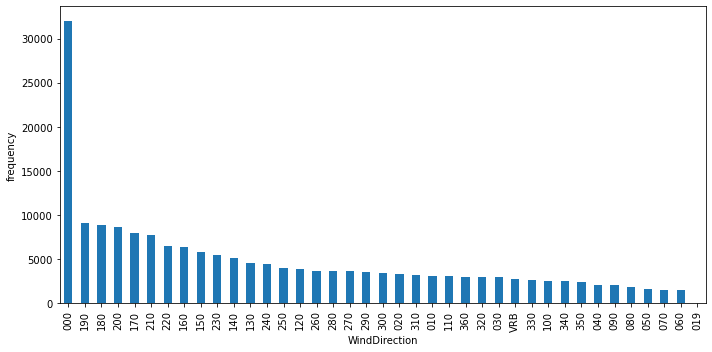

In [36]:
"""plotting bar plot to know the frequency of wind directions, which indicates that majority of the flight travel 
was not effected by wind directions"""
 
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

weather_01['WindDirection'].value_counts().plot(ax=ax, kind='bar', xlabel='WindDirection', ylabel='frequency')

plt.show()

#list1 = ['000','030','020','010','019']

for i in weather_01['WindDirection'].loc[weather_01['WindDirection'] == 'VRB']:
    if weather_01['WindDirection'].loc[i-1] == '000':
        weather_01['WindDirection'].loc[i].bfill()
    elif weather_01['WindDirection'].loc[i-1] == '030':
        weather_01['WindDirection'].loc[i].bfill()
    elif weather_01['WindDirection'].loc[i-1] == '020':
        weather_01['WindDirection'].loc[i].bfill()
    elif weather_01['WindDirection'].loc[i-1] == '010':
        weather_01['WindDirection'].loc[i].bfill()
    elif weather_01['WindDirection'].loc[i-1] == '019':
        weather_01['WindDirection'].loc[i].bfill()
    else:
        weather_01['WindDirection'].loc[i] == '030'

In [37]:
#Replacing the value 
weather_01['WindDirection'].replace('VRB','030',inplace = True)

In [38]:
weather_01['WindDirection'].unique()

array(['160', '030', '240', '000', '280', '230', '210', '290', '300',
       '220', '320', '250', '150', '140', '090', '120', '130', '100',
       '190', '170', '080', '270', '260', '110', '200', '180', '350',
       '070', '060', '020', '010', '340', '040', '360', '050', '330',
       '310', '019'], dtype=object)

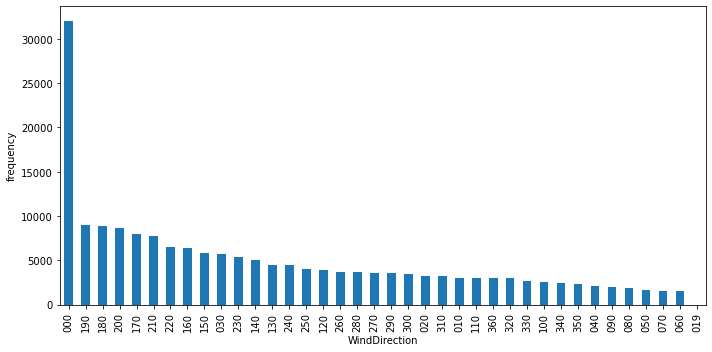

In [39]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

weather_01['WindDirection'].value_counts().plot(ax=ax, kind='bar', xlabel='WindDirection', ylabel='frequency')

plt.show()

In [40]:
weather_01['WindDirection'] = weather_01['WindDirection'].apply(np.int64)

In [41]:
weather_01.dtypes

WeatherStationID                    int64
YearMonthDay                        int64
Time                               object
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
WindGustValue                     float64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

In [42]:
weather_01.isnull().sum()

WeatherStationID               0
YearMonthDay                   0
Time                           0
SkyConditions               5017
Visibility                  4983
DBT                        36680
DewPointTemp               36806
RelativeHumidityPercent    36904
WindSpeed                   1178
WindDirection                  0
WindGustValue               1178
StationPressure            26279
HourlyPrecip               32210
YearMonthDay_Time              0
dtype: int64

In [46]:
weather_01['Time'] = weather_01['Time'].apply(np.int64)

In [47]:
weather_01.dtypes

WeatherStationID                    int64
YearMonthDay                        int64
Time                                int64
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
WindGustValue                     float64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

In [48]:
weather_01['Visibility'].unique()

array(['10SM', '9SM', '1.75SM', '1.5SM', '2.5SM', '4SM', '1.25SM', '7SM',
       '8SM', nan, '2SM', '5SM', '0.5SM', '1SM', '3SM', '0.75SM', '6SM',
       '0.25SM', '0.125SM', '15SM', '12SM', '3.5SM', '0SM', '0.0625SM',
       '30SM', '25SM', '20SM', '35SM'], dtype=object)

In [49]:
#Reading necessary files
hourly_03 = pd.read_csv('200403hourly.txt')
hpd_03 = pd.read_csv('200403hpd.txt')

hourly_05 = pd.read_csv('200405hourly.txt')
hpd_05 = pd.read_csv('200405hpd.txt')

hourly_07 = pd.read_csv('200407hourly.txt')
hpd_07 = pd.read_csv('200407hpd.txt')

hourly_09 = pd.read_csv('200409hourly.txt')
hpd_09 = pd.read_csv('200409hpd.txt')

hourly_11 = pd.read_csv('200411hourly.txt')
hpd_11 = pd.read_csv('200411hpd.txt')

In [50]:
#Merging the datatsets
weather_03 = pd.merge(hourly_03, hpd_03, how = 'left')

weather_05 = pd.merge(hourly_05, hpd_05, how = 'left')

weather_07 = pd.merge(hourly_07, hpd_07, how = 'left')

weather_09 = pd.merge(hourly_09, hpd_09, how = 'left')

weather_11 = pd.merge(hourly_11, hpd_11, how = 'left')

In [51]:
#Defining a function to sort the values for all the dataset 
def data(*args):
    for i in args:
        i.sort_values(['WeatherStationID','YearMonthDay','Time'],inplace = True, ignore_index = True)
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

In [52]:
 weather_01.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,YearMonthDay_Time
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0,2004-01-01 13:50:00
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,30,0.0,30.06,0.0,2004-01-01 19:10:00
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,30,0.0,30.06,0.0,2004-01-01 20:10:00
3,3011,20040102,410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0,2004-01-02 04:10:00
4,3011,20040102,730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,0,0.0,29.95,0.0,2004-01-02 07:30:00


In [54]:
def data(*args):
    for i in args:
        print(i.shape)
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

(182999, 14)

(1064793, 13)

(1751556, 13)

(1189463, 13)

(1126623, 13)

(1169743, 13)



In [55]:
def data(*args):
    for i in args:
        i['Time'] = i['Time'].astype(str)
        i['Time'] = i['Time'].str.zfill(4)
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

In [56]:
weather_05.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,20040501,0010,SCT012,10SM,30.0,28.0,92.0,0.0,000,0.0,30.27,0.0
1,3011,20040510,1210,CLR,10SM,64.0,21.0,19.0,15.0,240,0.0,30.12,0.0
2,3011,20040512,0630,OVC002,0.25SM,NaN,NaN,NaN,3,090,0.0,29.97,0.0
3,3011,20040512,0650,OVC002,0.25SM,NaN,NaN,NaN,NaN,NaN,NaN,29.94,0.0
4,3011,20040512,0710,OVC003,0.75SM,NaN,NaN,NaN,6,080,0.0,29.93,0.0


In [57]:
def data(*args):
    for i in args:
        i['YearMonthDay_Time'] = i['YearMonthDay'].astype(str) + i['Time'].astype(str)
        i['YearMonthDay_Time'] = pd.to_datetime(i['YearMonthDay_Time'], format='%Y%m%d%H%M')
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

In [59]:
#checking for unique values in WindDirection
def data(*args):
    for i in args:
        print()
        print(i['WindDirection'].unique())
        print()
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)


['270' '280' '250' '000' '150' '130' 'VRB' '260' '220' '300' '310' '290'
 '210' '240' '230' '200' '140' '320' '180' '100' '190' '110' '120' '160'
 '090' '350' '330' '080' '040' '020' '070' '170' '060' '340' '050' '030'
 '010' '360' nan '026' '231' '054']


['000' '240' '090' nan '080' 'VRB' '100' '120' '140' '110' '300' '200'
 '160' '150' '230' '210' '270' '250' '220' '280' '290' '130' '310' '320'
 '260' '180' '330' '190' '170' '050' '070' '010' '060' '020' '360' '340'
 '350' '030' '040' '108' '114' '112' '025' '035' '256' '014' '198' '013'
 '027' '011' '031' '219' '352' '244' '315' '261']


['140' '130' '150' 'VRB' '120' '270' '000' '200' '230' '240' '180' '250'
 '280' '260' '090' '210' '290' '300' '160' '330' '310' '170' '070' '100'
 '030' '110' '220' '190' '080' '320' '060' '360' '350' '050' '340' '040'
 '020' '010' nan '312' '153' '021' '263' '001' '343' '223' '217']


['140' '160' '150' '130' 'VRB' '000' '280' '250' '330' '290' '300' '080'
 '090' '240' '270' '190' '260' '230' '20

In [60]:
def data(*args):
    for i in args:
        i['WindDirection'] = i['WindDirection'].pad()
        i['WindDirection'].replace('VRB','030',inplace = True)
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

In [61]:
def data(*args):
    for i in args:
        print(i['WindDirection'].isnull().sum())
        print()
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

0

0

0

0

0



In [62]:
def data(*args):
    for i in args:
        i['WindDirection'] = i['WindDirection'].apply(np.int64)
        
data(weather_03,weather_05,weather_07,weather_09,weather_11)

In [63]:
def data(*args):
    for i in args:
        print(i.dtypes)
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

WeatherStationID                    int64
YearMonthDay                        int64
Time                                int64
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
WindGustValue                     float64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

WeatherStationID                    int64
YearMonthDay                        int64
Time                               object
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                          object
WindDirection      

In [64]:
def data(*args):
    for i in args:
        print(i['WindSpeed'].unique())
        print()
        
data(weather_03,weather_05,weather_07,weather_09)

[6.0 7.0 5.0 0.0 4.0 3.0 12.0 9.0 10.0 11.0 13.0 8.0 15.0 '5' '0' '3' '4'
 '6' '10' '7' '8' '12' '9' '11' '13' '18' '15' '16' '14' 14.0 19.0 18.0
 17.0 16.0 21.0 22.0 23.0 20.0 24.0 27.0 28.0 30.0 25.0 29.0 26.0 '17'
 '21' 33.0 31.0 32.0 '19' 34.0 nan 36.0 40.0 38.0 39.0 35.0 '20' 42.0 45.0
 43.0 37.0 '33' '36' '35' '37' '42' '39' '38' '41' '40' '34' '32' '27'
 '28' '25' '22' '23' '26' '29' 46.0 47.0 44.0 50.0 51.0 48.0 41.0 49.0
 '24' '30' '31' 1.0 2.0 '2' '1' '/1' 73.0 71.0 '45' '46' 53.0 52.0]

[0.0 15.0 '3' nan '6' '8' '9' '11' '4' '5' '12' '7' '15' '17' '13' '10'
 '14' '0' '16' 7.0 6.0 8.0 4.0 9.0 3.0 10.0 5.0 13.0 '18' 12.0 11.0 20.0
 14.0 17.0 16.0 18.0 21.0 '19' 22.0 25.0 19.0 23.0 26.0 33.0 30.0 '21'
 '23' '22' '20' '25' '24' 24.0 '26' 29.0 '30' '28' 27.0 32.0 28.0 35.0
 '27' 36.0 31.0 '29' 34.0 '41' '33' '34' '32' '31' 37.0 40.0 39.0 '37'
 '39' '38' '44' '45' '42' '36' '47' '43' 38.0 43.0 41.0 46.0 42.0 '35'
 '40' '46' 44.0 54.0 55.0 51.0 47.0 48.0 52.0 50.0 45.0 '48' '51' '5

In [69]:
def data(*args):
    for i in args:
        i['WindSpeed'].pad(inplace = True)
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

In [70]:
#Replacing the misinterpreted values with real values
weather_03['WindSpeed'] =  weather_03['WindSpeed'].replace(to_replace = '/1', value = '1')

weather_05['WindSpeed'] =  weather_05['WindSpeed'].replace(to_replace = '/1', value = '1')
weather_05['WindSpeed'] =  weather_05['WindSpeed'].replace(to_replace = '/0', value = '0')
weather_05['WindSpeed'] =  weather_05['WindSpeed'].replace(to_replace = '/2', value = '2')

weather_07['WindSpeed'] =  weather_07['WindSpeed'].replace(to_replace = '/1', value = '1')
weather_07['WindSpeed'] =  weather_07['WindSpeed'].replace(to_replace = '/0', value = '0')

weather_09['WindSpeed'] =  weather_09['WindSpeed'].replace(to_replace = '/0', value = '0')
weather_09['WindSpeed'] =  weather_09['WindSpeed'].replace(to_replace = '/1', value = '1')
weather_09['WindSpeed'] =  weather_09['WindSpeed'].replace(to_replace = '-3', value = '3')

In [71]:
def data(*args):
    for i in args:
        print(i['WindSpeed'].unique())
        print()
        
data(weather_03,weather_05,weather_07,weather_09)

[6.0 7.0 5.0 0.0 4.0 3.0 12.0 9.0 10.0 11.0 13.0 8.0 15.0 '5' '0' '3' '4'
 '6' '10' '7' '8' '12' '9' '11' '13' '18' '15' '16' '14' 14.0 19.0 18.0
 17.0 16.0 21.0 22.0 23.0 20.0 24.0 27.0 28.0 30.0 25.0 29.0 26.0 '17'
 '21' 33.0 31.0 32.0 '19' 34.0 36.0 40.0 38.0 39.0 35.0 '20' 42.0 45.0
 43.0 37.0 '33' '36' '35' '37' '42' '39' '38' '41' '40' '34' '32' '27'
 '28' '25' '22' '23' '26' '29' 46.0 47.0 44.0 50.0 51.0 48.0 41.0 49.0
 '24' '30' '31' 1.0 2.0 '2' '1' 73.0 71.0 '45' '46' 53.0 52.0]

[0.0 15.0 '3' '6' '8' '9' '11' '4' '5' '12' '7' '15' '17' '13' '10' '14'
 '0' '16' 7.0 6.0 8.0 4.0 9.0 3.0 10.0 5.0 13.0 '18' 12.0 11.0 20.0 14.0
 17.0 16.0 18.0 21.0 '19' 22.0 25.0 19.0 23.0 26.0 33.0 30.0 '21' '23'
 '22' '20' '25' '24' 24.0 '26' 29.0 '30' '28' 27.0 32.0 28.0 35.0 '27'
 36.0 31.0 '29' 34.0 '41' '33' '34' '32' '31' 37.0 40.0 39.0 '37' '39'
 '38' '44' '45' '42' '36' '47' '43' 38.0 43.0 41.0 46.0 42.0 '35' '40'
 '46' 44.0 54.0 55.0 51.0 47.0 48.0 52.0 50.0 45.0 '48' '51' '52' 2.0 1.0
 '

In [72]:
def data(*args):
    for i in args:
        print(i['WindSpeed'].isnull().sum())
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

0

0

0

0

0

0



In [73]:
def data(*args):
    for i in args:
        i['WindSpeed'] = i['WindSpeed'].astype(float)
        i['Time'] = i['Time'].apply(np.int64)
        
data(weather_03,weather_05,weather_07,weather_09)

In [74]:
weather_11['Time'] = weather_11['Time'].apply(np.int64)

In [75]:
def data(*args):
    for i in args:
        print(i.dtypes)
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

WeatherStationID                    int64
YearMonthDay                        int64
Time                                int64
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
WindGustValue                     float64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

WeatherStationID                    int64
YearMonthDay                        int64
Time                                int64
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection      

In [76]:
def data(*args):
    for i in args:
        print(i.shape)
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

(182999, 14)

(1064793, 14)

(1751556, 14)

(1189463, 14)

(1126623, 14)

(1169743, 14)



In [77]:
def data(*args):
    for i in args:
        print(i.isnull().sum())
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

WeatherStationID               0
YearMonthDay                   0
Time                           0
SkyConditions               5017
Visibility                  4983
DBT                        36680
DewPointTemp               36806
RelativeHumidityPercent    36904
WindSpeed                      0
WindDirection                  0
WindGustValue               1178
StationPressure            26279
HourlyPrecip               32210
YearMonthDay_Time              0
dtype: int64

WeatherStationID                0
YearMonthDay                    0
Time                            0
SkyConditions               16120
Visibility                  14935
DBT                        174909
DewPointTemp               176040
RelativeHumidityPercent    176316
WindSpeed                       0
WindDirection                   0
WindGustValue                3221
StationPressure            115027
HourlyPrecip               150039
YearMonthDay_Time               0
dtype: int64

WeatherStationID                0


In [79]:
#padding NaN values in dataframes

def data(*args):
    for i in args:
        i.pad(inplace = True)
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

In [80]:
def data(*args):
    for i in args:
        print(i.isna().sum())
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
YearMonthDay_Time          0
dtype: int64

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
YearMonthDay_Time          0
dtype: int64

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT            

In [81]:
def data(*args):
    for i in args:
        print(i.head())
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

   WeatherStationID  YearMonthDay  Time         SkyConditions Visibility  \
0              3011      20040101  1350         FEW075 BKN090       10SM   
1              3011      20040101  1910         BKN028 OVC033       10SM   
2              3011      20040101  2010         FEW025 OVC032        9SM   
3              3011      20040102   410  FEW045 BKN060 OVC080       10SM   
4              3011      20040102   730         BKN010 OVC017     1.75SM   

    DBT  DewPointTemp  RelativeHumidityPercent  WindSpeed  WindDirection  \
0  32.0          10.0                     40.0       15.0            160   
1  21.0          14.0                     74.0        5.0             30   
2  25.0          18.0                     75.0        4.0             30   
3  34.0          19.0                     54.0       16.0            240   
4  25.0          21.0                     85.0        0.0              0   

   WindGustValue  StationPressure  HourlyPrecip   YearMonthDay_Time  
0            0.0

In [82]:
#Concatenating all merged hourly and hpd data w.r.t ascending months
weather_2004 = pd.concat([weather_01,weather_03,weather_05,weather_07,weather_09,weather_11],ignore_index = True)

In [107]:
weather_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485177 entries, 0 to 6485176
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   WeatherStationID         int64         
 1   YearMonthDay             int64         
 2   Time                     int64         
 3   SkyConditions            object        
 4   Visibility               float64       
 5   DBT                      float64       
 6   DewPointTemp             float64       
 7   RelativeHumidityPercent  float64       
 8   WindSpeed                float64       
 9   WindDirection            int64         
 10  WindGustValue            float64       
 11  StationPressure          float64       
 12  HourlyPrecip             float64       
 13  YearMonthDay_Time        datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(4), object(1)
memory usage: 692.7+ MB


In [83]:
weather_2004.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,YearMonthDay_Time
0,3011,20040101,1350,FEW075 BKN090,10SM,32.0,10.0,40.0,15.0,160,0.0,30.05,0.0,2004-01-01 13:50:00
1,3011,20040101,1910,BKN028 OVC033,10SM,21.0,14.0,74.0,5.0,30,0.0,30.06,0.0,2004-01-01 19:10:00
2,3011,20040101,2010,FEW025 OVC032,9SM,25.0,18.0,75.0,4.0,30,0.0,30.06,0.0,2004-01-01 20:10:00
3,3011,20040102,410,FEW045 BKN060 OVC080,10SM,34.0,19.0,54.0,16.0,240,27.0,29.92,0.0,2004-01-02 04:10:00
4,3011,20040102,730,BKN010 OVC017,1.75SM,25.0,21.0,85.0,0.0,0,0.0,29.95,0.0,2004-01-02 07:30:00


In [84]:
weather_2004.tail()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,YearMonthDay_Time
6485172,94999,20041130,1255,CLR,10SM,36.0,25.0,64.0,9.0,200,0.0,29.84,0.0,2004-11-30 12:55:00
6485173,94999,20041130,1355,CLR,10SM,37.0,25.0,62.0,6.0,230,0.0,29.82,0.0,2004-11-30 13:55:00
6485174,94999,20041130,1455,CLR,10SM,37.0,23.0,57.0,8.0,220,0.0,29.80,0.0,2004-11-30 14:55:00
6485175,94999,20041130,1555,CLR,10SM,37.0,25.0,62.0,7.0,200,0.0,29.79,0.0,2004-11-30 15:55:00
6485176,94999,20041130,1655,CLR,10SM,34.0,23.0,64.0,4.0,200,0.0,29.79,0.0,2004-11-30 16:55:00


In [85]:
weather_2004.shape

(6485177, 14)

In [86]:
weather_2004['Visibility'].nunique()

73

In [87]:
weather_2004['Visibility'].unique()

array(['10SM', '9SM', '1.75SM', '1.5SM', '2.5SM', '4SM', '1.25SM', '7SM',
       '8SM', '2SM', '5SM', '0.5SM', '1SM', '3SM', '0.75SM', '6SM',
       '0.25SM', '0.125SM', '15SM', '12SM', '3.5SM', '0SM', '0.0625SM',
       '30SM', '25SM', '20SM', '35SM', '54SM', '55SM', '2.75SM', '10.5SM',
       '100SM', '16007SM', '74SM', '11SM', '13SM', '14SM', '05SM',
       '0.625SM', '0.875SM', '7.5SM', '0.375SM', '5.5SM', '2.25SM',
       '109SM', '3.25SM', '40SM', '31008SM', '65SM', '50SM', '60SM',
       '12006SM', '18SM', '1.125SM', '56SM', '0.1875SM', '21SM', '45SM',
       '19SM', '1.375SM', '24SM', '5/8SM', '0.3125SM', '72SM', '280SM',
       '70SM', '1.625SM', '77SM', '17SM', '1.875SM', '0.4SM', '16SM',
       '63SM'], dtype=object)

In [88]:
weather_2004['Visibility'].pad(inplace = True)
weather_2004['Visibility'] = weather_2004['Visibility'].str.strip('SM')

In [89]:
weather_2004.replace(to_replace = '5/8', value = '0.625',inplace = True)

In [90]:
weather_2004['Visibility'] = weather_2004['Visibility'].astype(float)

In [91]:
weather_2004.dtypes

WeatherStationID                    int64
YearMonthDay                        int64
Time                                int64
SkyConditions                      object
Visibility                        float64
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
WindGustValue                     float64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

In [92]:
#Checking for correlation between independent features
corr = weather_2004.corr()
corr.style.background_gradient(cmap='flare').set_precision(2)

,WeatherStationID,YearMonthDay,Time,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
WeatherStationID,1.00,0.17,-0.00,0.00,0.09,0.09,0.00,-0.07,-0.04,-0.05,-0.07,0.01
YearMonthDay,0.17,1.00,-0.00,-0.01,0.07,0.11,0.07,-0.13,-0.09,-0.09,-0.05,0.03
Time,-0.00,-0.00,1.00,0.02,0.12,0.01,-0.19,0.08,0.05,0.04,-0.01,0.01
Visibility,0.00,-0.01,0.02,1.00,0.02,-0.02,-0.09,0.02,0.03,0.01,-0.01,-0.03
DBT,0.09,0.07,0.12,0.02,1.00,0.82,-0.26,0.03,-0.01,0.01,0.05,0.02
DewPointTemp,0.09,0.11,0.01,-0.02,0.82,1.00,0.32,-0.09,-0.10,-0.09,0.16,0.08
RelativeHumidityPercent,0.00,0.07,-0.19,-0.09,-0.26,0.32,1.00,-0.23,-0.17,-0.16,0.16,0.11
WindSpeed,-0.07,-0.13,0.08,0.02,0.03,-0.09,-0.23,1.00,0.45,0.63,-0.08,0.04
WindDirection,-0.04,-0.09,0.05,0.03,-0.01,-0.10,-0.17,0.45,1.00,0.19,-0.04,-0.01
WindGustValue,-0.05,-0.09,0.04,0.01,0.01,-0.09,-0.16,0.63,0.19,1.00,-0.01,0.03


In [93]:
def data(*args):
    for i in args:
        print(i.isna().sum())
        print()
        
data(weather_01,weather_03,weather_05,weather_07,weather_09,weather_11)

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
YearMonthDay_Time          0
dtype: int64

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
DewPointTemp               0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
YearMonthDay_Time          0
dtype: int64

WeatherStationID           0
YearMonthDay               0
Time                       0
SkyConditions              0
Visibility                 0
DBT            

In [97]:
#Dropping highly correlated columns
weather_2004_v1 = weather_2004.drop(['DewPointTemp','WindGustValue'], axis = 1)

In [98]:
weather_2004_v1.drop(['YearMonthDay','Time'],axis = 1,inplace = True)

In [99]:
weather_2004_v1.shape

(6485177, 10)

In [100]:
#Final consolidated weather dataframe
weather_2004_v1.head()

,WeatherStationID,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,StationPressure,HourlyPrecip,YearMonthDay_Time
0,3011,FEW075 BKN090,10.00,32.0,40.0,15.0,160,30.05,0.0,2004-01-01 13:50:00
1,3011,BKN028 OVC033,10.00,21.0,74.0,5.0,30,30.06,0.0,2004-01-01 19:10:00
2,3011,FEW025 OVC032,9.00,25.0,75.0,4.0,30,30.06,0.0,2004-01-01 20:10:00
3,3011,FEW045 BKN060 OVC080,10.00,34.0,54.0,16.0,240,29.92,0.0,2004-01-02 04:10:00
4,3011,BKN010 OVC017,1.75,25.0,85.0,0.0,0,29.95,0.0,2004-01-02 07:30:00


In [108]:
weather_2004_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485177 entries, 0 to 6485176
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   WeatherStationID         int64         
 1   SkyConditions            object        
 2   Visibility               float64       
 3   DBT                      float64       
 4   RelativeHumidityPercent  float64       
 5   WindSpeed                float64       
 6   WindDirection            int64         
 7   StationPressure          float64       
 8   HourlyPrecip             float64       
 9   YearMonthDay_Time        datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 494.8+ MB


In [101]:
weather_2004_v1.dtypes

WeatherStationID                    int64
SkyConditions                      object
Visibility                        float64
DBT                               float64
RelativeHumidityPercent           float64
WindSpeed                         float64
WindDirection                       int64
StationPressure                   float64
HourlyPrecip                      float64
YearMonthDay_Time          datetime64[ns]
dtype: object

In [102]:
weather_2004_v1.nunique()

WeatherStationID             1447
SkyConditions              247019
Visibility                     71
DBT                           170
RelativeHumidityPercent        99
WindSpeed                      69
WindDirection                  82
StationPressure              1006
HourlyPrecip                  256
YearMonthDay_Time          218044
dtype: int64

In [105]:
weather_2004_v1.isna().sum()

WeatherStationID           0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
StationPressure            0
HourlyPrecip               0
YearMonthDay_Time          0
dtype: int64

In [106]:
#saving the file in csv format for further merging and analysis
weather_2004_v1.to_csv('weather_2004_v2.csv',index_label = False)